## Final Project Submission

Please fill out:
* Student name: Daniel Quillao
* Student pace: Self-paced
* Scheduled project review date/time: TBD
* Instructor name: Jeff Herman
* Blog post URL:

# 1. Obtain Data

In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [256]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# 2. Scrub and Clean Data

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Check for erroneous values

In [258]:
# Preview the 5 most frequent entries from each column
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

Notes: sqft_basement change to float, update '?' values

In [259]:
# sqft_basement: check for instances of '?'
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1798.0        1
1525.0        1
2180.0        1
1913.0        1
176.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [260]:
# Drop rows as it only accounts for 2% of the data
df = df.drop(df[df['sqft_basement']=='?'].index)

In [261]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

## Check for nulls

In [262]:
# Check sum of nulls
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Note: Check waterfront, view, and yr_renovated

In [263]:
# Get statistics
df[['waterfront', 'view', 'yr_renovated']].describe()

,waterfront,view,yr_renovated
count,18804.000000,21082.000000,17389.000000
mean,0.007552,0.233327,82.991949
std,0.086573,0.765066,398.481819
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,4.000000,2015.000000


In [264]:
null_list = ['waterfront', 'view', 'yr_renovated']

for feature in null_list:
    print(df[feature].value_counts())

0.0    18662
1.0      142
Name: waterfront, dtype: int64
0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64
0.0       16666
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64


Notes:
- waterfront has 2339 null values
- view has 61 null values
- yr_renovated has 3754 null values
- The majority of the data is 0 for these features. Update null values to 0.

In [265]:
# Update null values to 0
df.fillna(0, inplace = True)

In [266]:
# Double-check for null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [267]:
# Check for duplicates
print(len(df[df.duplicated()]))

0


## Feature Engineering

Notes:
- yr_renovated: convert to binary {0: not renovated, 1: renovated}
- sqft_basement: convert to binary {0: no basement, 1: has basement}
- view: convert to binary {0: not viewed, 1: has been viewed}
- waterfront: convert to binary {0: no waterfront, 1: has waterfront}
- date and id: not useful, drop
- lat and long: should be categorical, however might be better to drop (i think zip code will be a similar/better feauture)

In [268]:
# yr_renovated
df['yr_renovated'].value_counts()

0.0       20420
2014.0       69
2003.0       31
2013.0       31
2007.0       30
          ...  
1953.0        1
1944.0        1
1934.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 69, dtype: int64

In [269]:
# Create new column renovated
df['renovated'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
# Drop yr_renovated column
df = df.drop('yr_renovated', axis=1)

In [270]:
# Check new column
df['renovated'].value_counts()

0    20420
1      723
Name: renovated, dtype: int64

In [271]:
# sqft_basement
df['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [272]:
# Create new column basement
df['basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
# Drop sqft_basement column
df = df.drop('sqft_basement', axis=1)

In [273]:
# Check new column
df['basement'].value_counts()

0    12826
1     8317
Name: basement, dtype: int64

In [274]:
# view
df['view'].value_counts()

0.0    19079
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

In [275]:
# Update view
df['view'] = df['view'].map(lambda x: 1 if x > 0 else 0)

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  float64
 9   view           21143 non-null  int64  
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  yr_built       21143 non-null  int64  
 14  zipcode        21143 non-null  int64  
 15  lat            21143 non-null  float64
 16  long           21143 non-null  float64
 17  sqft_living15  21143 non-null  int64  
 18  sqft_l

In [277]:
# waterfront
df['waterfront'].value_counts()

0.0    21001
1.0      142
Name: waterfront, dtype: int64

In [278]:
# Update waterfront
df['waterfront'] = df['waterfront'].map(lambda x: 1 if x > 0 else 0)

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  int64  
 9   view           21143 non-null  int64  
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  yr_built       21143 non-null  int64  
 14  zipcode        21143 non-null  int64  
 15  lat            21143 non-null  float64
 16  long           21143 non-null  float64
 17  sqft_living15  21143 non-null  int64  
 18  sqft_l

In [280]:
# Drop: 
# id: not useful, drop
# lat and long: should be categorical, drop (i think zip code will be a similar/better feauture)
df.drop(columns=['date', 'id', 'lat', 'long'], inplace=True) 

In [281]:
# cols to round
#cols = ['bedrooms', 'bathrooms']

#df[cols] = df[cols].round(0)
#df[cols]

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21143 non-null  float64
 1   bedrooms       21143 non-null  int64  
 2   bathrooms      21143 non-null  float64
 3   sqft_living    21143 non-null  int64  
 4   sqft_lot       21143 non-null  int64  
 5   floors         21143 non-null  float64
 6   waterfront     21143 non-null  int64  
 7   view           21143 non-null  int64  
 8   condition      21143 non-null  int64  
 9   grade          21143 non-null  int64  
 10  sqft_above     21143 non-null  int64  
 11  yr_built       21143 non-null  int64  
 12  zipcode        21143 non-null  int64  
 13  sqft_living15  21143 non-null  int64  
 14  sqft_lot15     21143 non-null  int64  
 15  renovated      21143 non-null  int64  
 16  basement       21143 non-null  int64  
dtypes: float64(3), int64(14)
memory usage: 2.9 MB


In [283]:
df['bathrooms'] = df.bathrooms.astype(int)
df['waterfront'] = df.waterfront.astype(int)

## Check for outliers

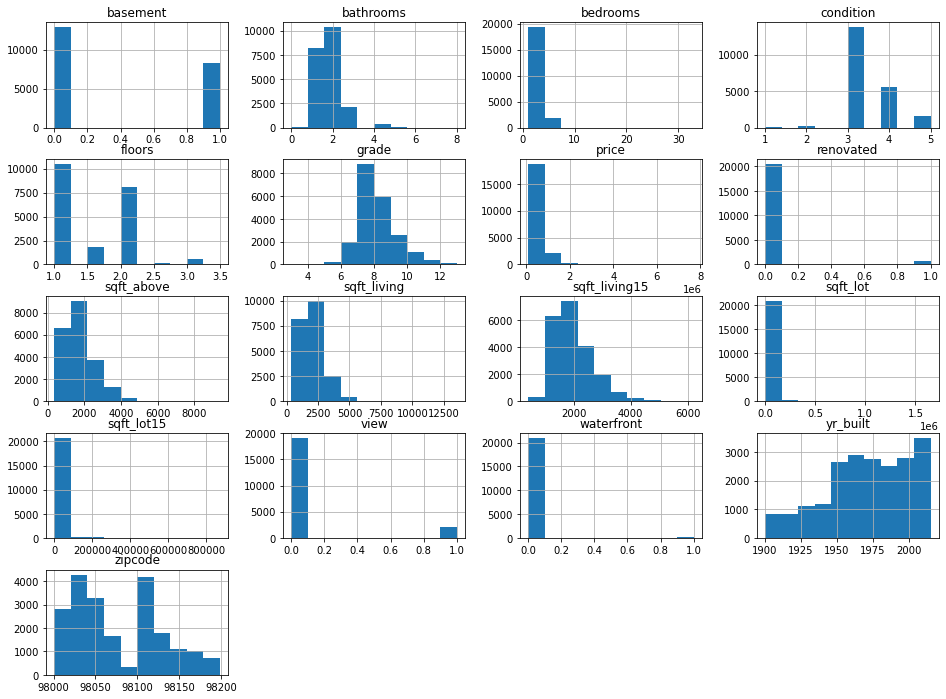

In [284]:
df.hist(figsize=(16, 12));

Notes: Look at bathrooms, bedrooms, price, sqft features

In [285]:
# bathrooms
#df['bathrooms'].hist();

In [286]:
#for i in range(90,100):
#    q = i/100
#    print("{} percentile: {}".format(q, df.bathrooms.quantile(q=q)))

In [287]:
#df['bathrooms'].value_counts()

In [288]:
# Set limit to 4
#df = df[df['bathrooms']<=4]

In [289]:
# bathrooms
#df['bathrooms'].hist();

In [290]:
# bedrooms
#df['bedrooms'].hist();

In [291]:
#df['bedrooms'].value_counts()

In [292]:
#for i in range(90,100):
#    q = i/100
#    print("{} percentile: {}".format(q, df.bedrooms.quantile(q=q)))

In [293]:
# Set limit to 12
#df = df[df['bedrooms']<=5]

In [294]:
#df['bedrooms'].hist()

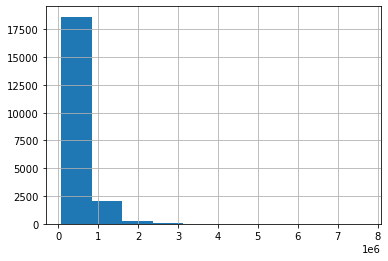

In [295]:
#price
df.price.hist();

In [296]:
df.price.value_counts()

350000.0    168
450000.0    167
550000.0    155
500000.0    149
425000.0    146
           ... 
234975.0      1
804995.0      1
870515.0      1
336950.0      1
884744.0      1
Name: price, Length: 3581, dtype: int64

In [297]:
for i in range(90,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.9 percentile: 888998.0
0.91 percentile: 920000.0
0.92 percentile: 950000.0
0.93 percentile: 998000.0
0.94 percentile: 1070000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1400000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


In [298]:
# Set limit to 1100000
df = df[df['price']<=1100000]

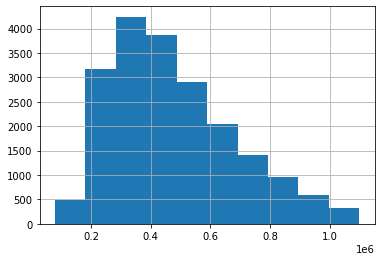

In [299]:
df.price.hist();

In [300]:
# features
sqft_feats = ['bathrooms', 'bedrooms','floors', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above']

# Removes feats with z-score above 3 for specific columns
# Reference https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
for feat in sqft_feats:
    df = df[np.abs(df[feat]-df[feat].mean()) <= (3*df[feat].std())]

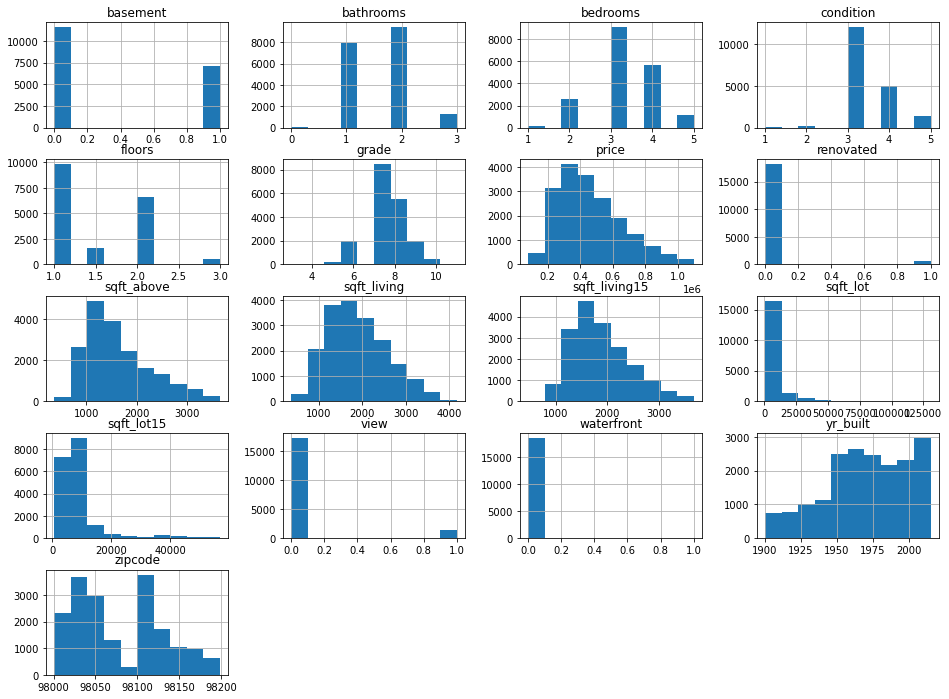

In [301]:
df.hist(figsize=(16,12));

In [302]:
df.floors.value_counts()

1.0    9805
2.0    6584
1.5    1659
3.0     543
2.5      86
Name: floors, dtype: int64

In [303]:
df.bedrooms.value_counts()

3    9055
4    5707
2    2596
5    1137
1     182
Name: bedrooms, dtype: int64

In [304]:
df.bathrooms.value_counts()

2    9385
1    7923
3    1299
0      70
Name: bathrooms, dtype: int64

## Normalize Continuous Features

In [305]:
# Log transform to reduce skewness
# Don't bother to normalize the price as this is the feature we will be predicting
# Remember that you can't take the logarithm of zero nor a negative number = bathrooms (decided to not include bathrooms, bedrooms, floors)
log_feats = ['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above']
for var in log_feats:
    df[var]= np.log(df[var])

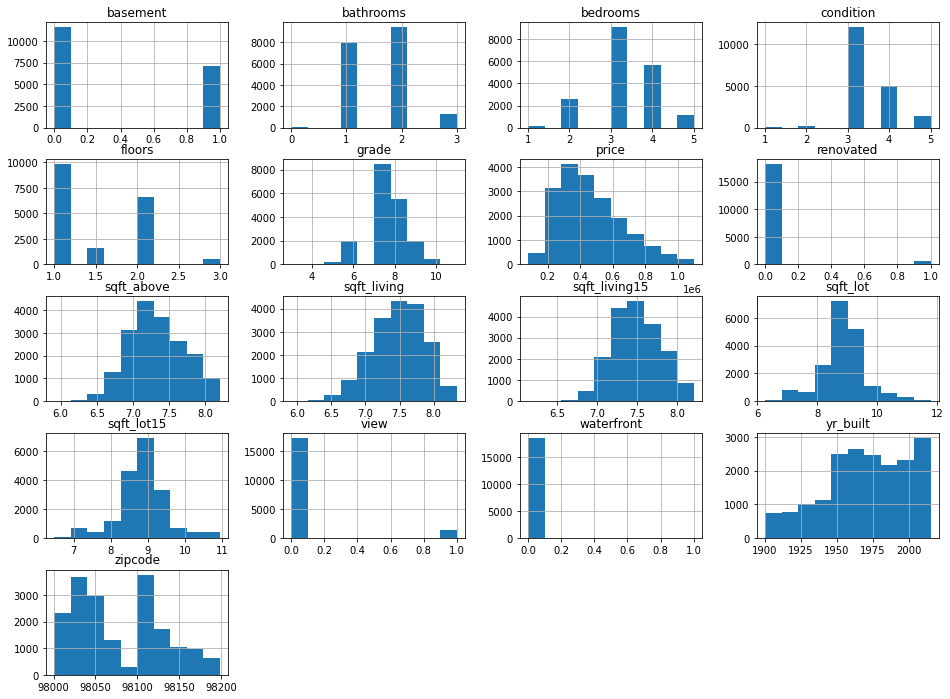

In [306]:
df.hist(figsize = (16,12));

In [307]:
# Standardization (z-score normalization)
# x' will have mean  𝜇=0  and  𝜎=1 
# Note that standardization does not make data more normal, it will just change the mean and the standard error!

continuous_feats = ['bathrooms', 'bedrooms', 'floors','sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above']

for var in continuous_feats:
    df[var] = (df[var] - df[var].mean()) / df[var].std()

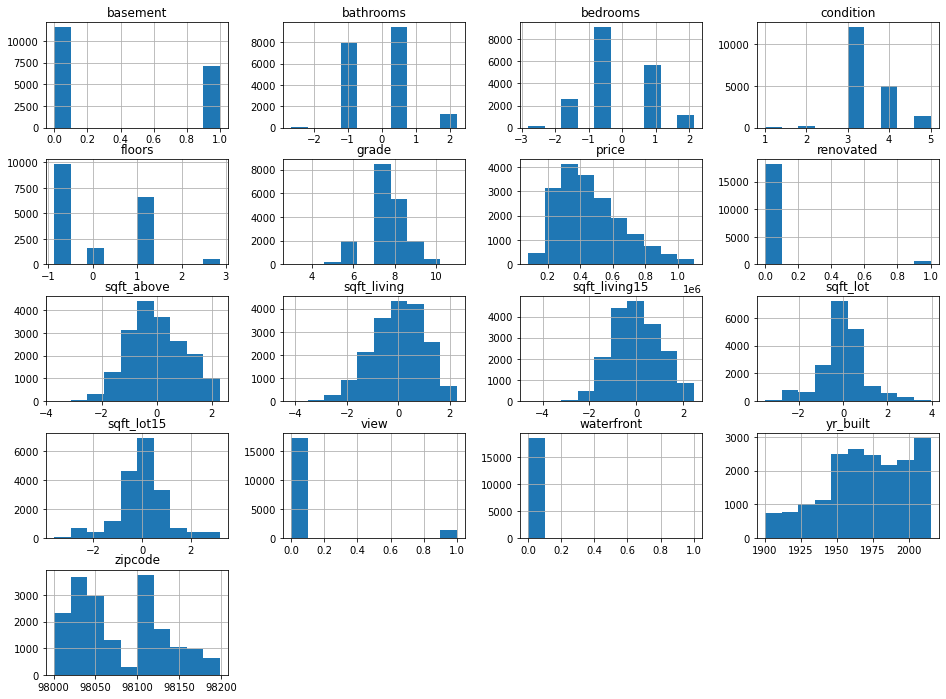

In [308]:
df.hist(figsize = (16, 12));

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18677 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18677 non-null  float64
 1   bedrooms       18677 non-null  float64
 2   bathrooms      18677 non-null  float64
 3   sqft_living    18677 non-null  float64
 4   sqft_lot       18677 non-null  float64
 5   floors         18677 non-null  float64
 6   waterfront     18677 non-null  int64  
 7   view           18677 non-null  int64  
 8   condition      18677 non-null  int64  
 9   grade          18677 non-null  int64  
 10  sqft_above     18677 non-null  float64
 11  yr_built       18677 non-null  int64  
 12  zipcode        18677 non-null  int64  
 13  sqft_living15  18677 non-null  float64
 14  sqft_lot15     18677 non-null  float64
 15  renovated      18677 non-null  int64  
 16  basement       18677 non-null  int64  
dtypes: float64(9), int64(8)
memory usage: 2.6 MB


# Explore Data

## What are my top zip codes

In [310]:
df.zipcode.value_counts()

98103    558
98115    533
98052    523
98117    522
98042    509
        ... 
98010     75
98070     64
98148     54
98024     40
98039      6
Name: zipcode, Length: 70, dtype: int64

In [315]:
# Create copy
dfziptiers = df.copy()

In [316]:
# Groupby zipcode and take median price
dfzipmed = dfziptiers.groupby(dfziptiers['zipcode'])['price'].median().sort_values(ascending = False)

# Reset index after groupy
dfzipmed = dfzipmed.reset_index()

# Set as string to match
dfzipmed['zipcode'] = dfzipmed['zipcode'].astype('object')

dfzipmed.head()

,zipcode,price
0,98039,906250.0
1,98040,835450.0
2,98004,825000.0
3,98005,725500.0
4,98112,724900.0


In [317]:
# Count number of houses in each zipcode

# Get list of unique zipcodes
zipcodelist = list(dfzipmed['zipcode'].unique())

# Create empty dictionary
zipcodecount = {}

# iterate through unique zipcodes and add count to dictionary
for zipcode in zipcodelist:
    count = len(dfziptiers[dfziptiers['zipcode'] == zipcode])
    zipcodecount[zipcode] = count
    
# create DataFrame based on count
dfzipcount = pd.DataFrame.from_dict(zipcodecount, orient='index')
dfzipcount = dfzipcount.reset_index()
dfzipcount = dfzipcount.rename(columns = {'index': 'zipcode', 0 :'count'})
dfzipcount.head()

,zipcode,count
0,98039,6
1,98040,146
2,98004,149
3,98005,134
4,98112,158


In [318]:
# Merge the two tables
df_zip_price_count = dfzipmed.merge(dfzipcount, how = 'inner')
df_zip_price_count

,zipcode,price,count
0,98039,906250.0,6
1,98040,835450.0,146
2,98004,825000.0,149
3,98005,725500.0,134
4,98112,724900.0,158
...,...,...,...
65,98188,261000.0,123
66,98001,260000.0,344
67,98032,249000.0,120
68,98168,235000.0,260


In [319]:
# Define dictionary of tiers
tiers = {}
for i in range(0, len(dfzipmed), 7):
    tiers[f'zip_tier_{int((i/7)+1)}'] = list(dfzipmed['zipcode'])[i:i + 7]
print(tiers)

{'zip_tier_1': [98039, 98040, 98004, 98005, 98112, 98109, 98075], 'zip_tier_2': [98119, 98006, 98102, 98199, 98033, 98074, 98105], 'zip_tier_3': [98052, 98077, 98053, 98029, 98115, 98116, 98122], 'zip_tier_4': [98103, 98027, 98007, 98008, 98117, 98107, 98177], 'zip_tier_5': [98072, 98065, 98136, 98011, 98034, 98028, 98144], 'zip_tier_6': [98125, 98070, 98059, 98019, 98126, 98056, 98133], 'zip_tier_7': [98045, 98155, 98166, 98118, 98024, 98014, 98108], 'zip_tier_8': [98038, 98058, 98010, 98106, 98146, 98092, 98055], 'zip_tier_9': [98031, 98042, 98030, 98148, 98178, 98023, 98198], 'zip_tier_10': [98003, 98022, 98188, 98001, 98032, 98168, 98002]}


In [320]:
# Create column with tiers
for key in tiers.keys():
    dfziptiers[key] = 0

# reset index before enumerate
dfziptiers = dfziptiers.reset_index(drop=True)

 # Change value to 1 if zipcode is in tier   
for index, zipcode in enumerate(dfziptiers['zipcode']):
    for key in tiers.keys():
        if zipcode in tiers[key]:
            dfziptiers.loc[index, key] = 1

In [321]:
dfziptiers.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zip_tier_1,zip_tier_2,zip_tier_3,zip_tier_4,zip_tier_5,zip_tier_6,zip_tier_7,zip_tier_8,zip_tier_9,zip_tier_10
0,221900.0,-0.332220,-1.037978,-1.080069,-0.298311,-0.860913,0,0,3,7,...,0,0,0,0,0,0,0,0,1,0
1,538000.0,-0.332220,0.589347,0.990508,0.036966,1.002594,0,0,3,7,...,0,0,0,0,0,1,0,0,0,0
2,180000.0,-1.568006,-1.037978,-2.215598,0.472789,-0.860913,0,0,3,6,...,0,0,0,0,1,0,0,0,0,0
3,604000.0,0.903565,2.216672,0.269731,-0.463378,-0.860913,0,0,5,7,...,0,0,0,0,1,0,0,0,0,0
4,510000.0,-0.332220,0.589347,-0.140320,0.184850,-0.860913,0,0,3,8,...,0,1,0,0,0,0,0,0,0,0


In [322]:
dfziptiers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18677 entries, 0 to 18676
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18677 non-null  float64
 1   bedrooms       18677 non-null  float64
 2   bathrooms      18677 non-null  float64
 3   sqft_living    18677 non-null  float64
 4   sqft_lot       18677 non-null  float64
 5   floors         18677 non-null  float64
 6   waterfront     18677 non-null  int64  
 7   view           18677 non-null  int64  
 8   condition      18677 non-null  int64  
 9   grade          18677 non-null  int64  
 10  sqft_above     18677 non-null  float64
 11  yr_built       18677 non-null  int64  
 12  zipcode        18677 non-null  int64  
 13  sqft_living15  18677 non-null  float64
 14  sqft_lot15     18677 non-null  float64
 15  renovated      18677 non-null  int64  
 16  basement       18677 non-null  int64  
 17  zip_tier_1     18677 non-null  int64  
 18  zip_ti

## Check for linearity

/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/Users/daniel/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warning

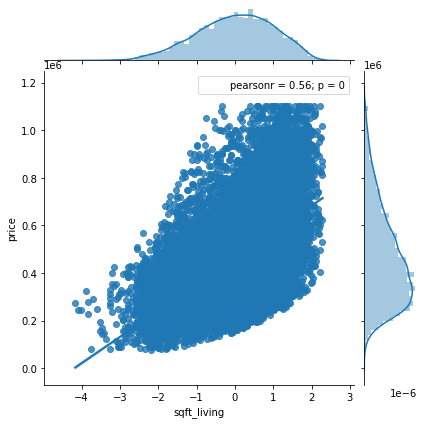

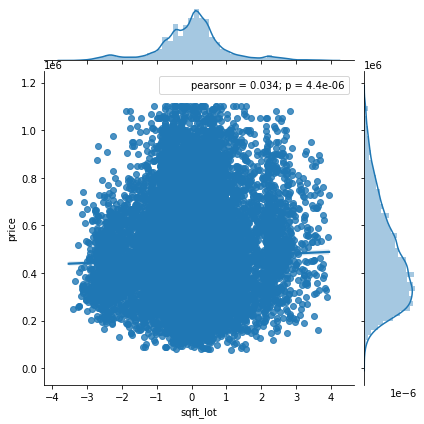

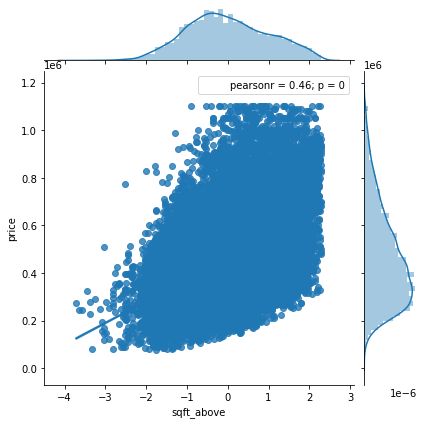

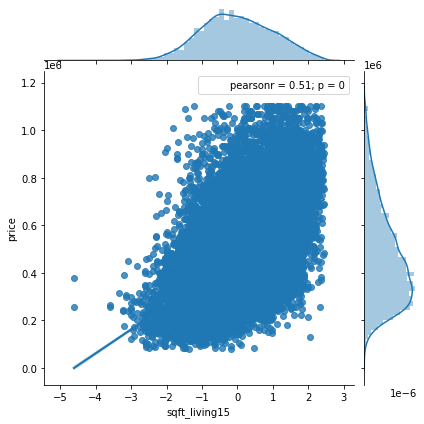

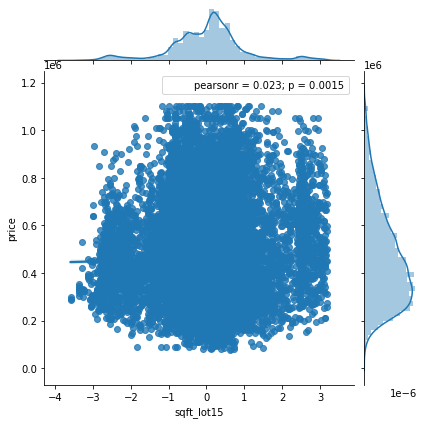

In [186]:
# Plot joint plots
continuous_feats = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']

for feat in continuous_feats:
    j = sns.jointplot(x = df[feat], y = df['price'], kind = 'reg')
    j.annotate(stats.pearsonr)

Note: sqft_living has the best linear relationship with price

# Box Plots

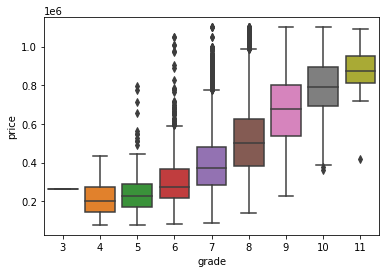

In [187]:
sns.boxplot(x = df['grade'], y = df['price'])

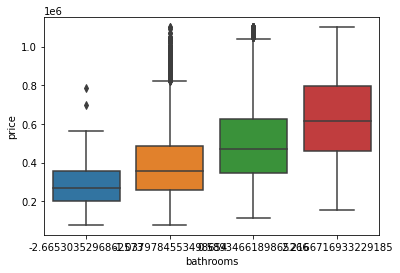

In [188]:
sns.boxplot(x = df['bathrooms'], y = df['price'])

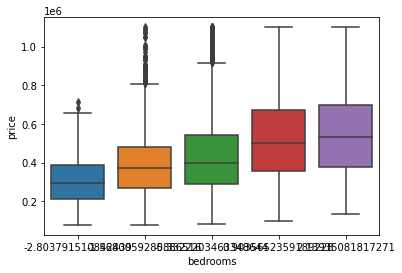

In [189]:
sns.boxplot(x = df['bedrooms'], y = df['price'])

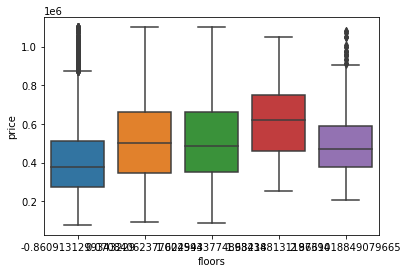

In [190]:
sns.boxplot(x = df['floors'], y = df['price'])

No relationship with price

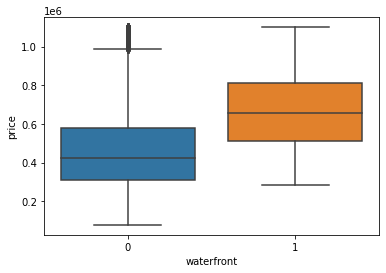

In [191]:
sns.boxplot(x = df['waterfront'], y = df['price'])

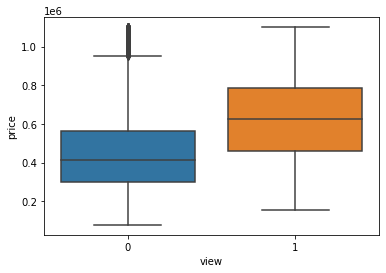

In [192]:
sns.boxplot(x = df['view'], y = df['price'])

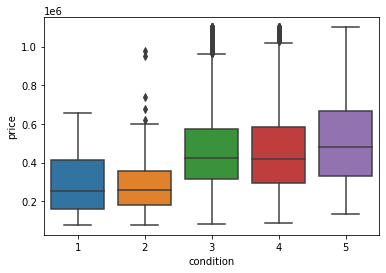

In [193]:
sns.boxplot(x = df['condition'], y = df['price'])

## Check for multicollinearity

In [194]:
corr = df.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
price,1.000000,0.272425,0.355145,0.557400,0.033595,0.245180,0.045119,0.235169,0.061657,0.592583,0.458696,0.017201,0.002342,0.507505,0.023299,0.089983,0.185869
bedrooms,0.272425,1.000000,0.410194,0.637140,0.217226,0.152762,-0.028243,0.031064,0.029197,0.335349,0.517016,0.188656,-0.172556,0.411322,0.202866,-0.010505,0.140725
bathrooms,0.355145,0.410194,1.000000,0.594953,-0.054996,0.481504,-0.018851,0.056751,-0.136587,0.516054,0.550751,0.483845,-0.161828,0.428232,-0.054338,0.027033,0.097172
sqft_living,0.557400,0.637140,0.594953,1.000000,0.263847,0.326529,-0.003243,0.141815,-0.043959,0.670774,0.829738,0.357082,-0.215606,0.708497,0.244345,0.020382,0.231406
sqft_lot,0.033595,0.217226,-0.054996,0.263847,1.000000,-0.361541,0.048424,0.063992,0.121589,0.060943,0.240563,-0.088693,-0.257750,0.323970,0.910639,0.009598,-0.046827
floors,0.245180,0.152762,0.481504,0.326529,-0.361541,1.000000,-0.006595,-0.033794,-0.275973,0.452311,0.532558,0.514338,-0.062785,0.239083,-0.348418,-0.007610,-0.285172
waterfront,0.045119,-0.028243,-0.018851,-0.003243,0.048424,-0.006595,1.000000,0.166351,0.005171,-0.015810,-0.009806,-0.033778,0.047382,0.008756,0.056841,0.054225,0.012486
view,0.235169,0.031064,0.056751,0.141815,0.063992,-0.033794,0.166351,1.000000,0.039897,0.115834,0.046654,-0.087707,0.122457,0.179603,0.062116,0.049445,0.162492
condition,0.061657,0.029197,-0.136587,-0.043959,0.121589,-0.275973,0.005171,0.039897,1.000000,-0.163536,-0.153813,-0.351680,-0.011104,-0.097539,0.126908,-0.054493,0.127698
grade,0.592583,0.335349,0.516054,0.670774,0.060943,0.452311,-0.015810,0.115834,-0.163536,1.000000,0.678018,0.486649,-0.177728,0.622583,0.074585,-0.008380,0.017290


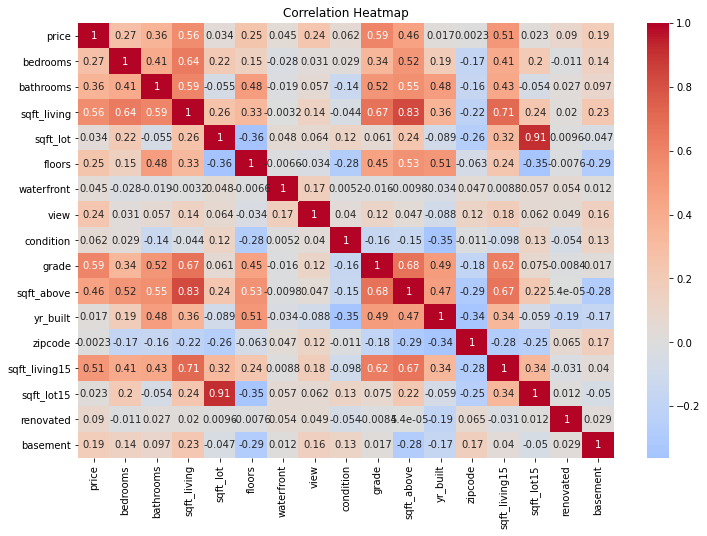

In [195]:
# Plot heatmap
plt.figure(figsize = (12,8))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [196]:
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
price,1.000000,0.272425,0.355145,0.557400,0.033595,0.245180,0.045119,0.235169,0.061657,0.592583,0.458696,0.017201,0.002342,0.507505,0.023299,0.089983,0.185869
bedrooms,0.272425,1.000000,0.410194,0.637140,0.217226,0.152762,-0.028243,0.031064,0.029197,0.335349,0.517016,0.188656,-0.172556,0.411322,0.202866,-0.010505,0.140725
bathrooms,0.355145,0.410194,1.000000,0.594953,-0.054996,0.481504,-0.018851,0.056751,-0.136587,0.516054,0.550751,0.483845,-0.161828,0.428232,-0.054338,0.027033,0.097172
sqft_living,0.557400,0.637140,0.594953,1.000000,0.263847,0.326529,-0.003243,0.141815,-0.043959,0.670774,0.829738,0.357082,-0.215606,0.708497,0.244345,0.020382,0.231406
sqft_lot,0.033595,0.217226,-0.054996,0.263847,1.000000,-0.361541,0.048424,0.063992,0.121589,0.060943,0.240563,-0.088693,-0.257750,0.323970,0.910639,0.009598,-0.046827
floors,0.245180,0.152762,0.481504,0.326529,-0.361541,1.000000,-0.006595,-0.033794,-0.275973,0.452311,0.532558,0.514338,-0.062785,0.239083,-0.348418,-0.007610,-0.285172
waterfront,0.045119,-0.028243,-0.018851,-0.003243,0.048424,-0.006595,1.000000,0.166351,0.005171,-0.015810,-0.009806,-0.033778,0.047382,0.008756,0.056841,0.054225,0.012486
view,0.235169,0.031064,0.056751,0.141815,0.063992,-0.033794,0.166351,1.000000,0.039897,0.115834,0.046654,-0.087707,0.122457,0.179603,0.062116,0.049445,0.162492
condition,0.061657,0.029197,-0.136587,-0.043959,0.121589,-0.275973,0.005171,0.039897,1.000000,-0.163536,-0.153813,-0.351680,-0.011104,-0.097539,0.126908,-0.054493,0.127698
grade,0.592583,0.335349,0.516054,0.670774,0.060943,0.452311,-0.015810,0.115834,-0.163536,1.000000,0.678018,0.486649,-0.177728,0.622583,0.074585,-0.008380,0.017290


In [197]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_abs = corr.abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_abs['pairs'] = list(zip(df_abs.level_0, df_abs.level_1))

# set index to pairs
df_abs.set_index(['pairs'], inplace = True)

#d rop level columns
df_abs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_abs.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_abs.drop_duplicates(inplace=True)

In [198]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,renovated,basement
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [199]:
df_abs[(df_abs.cc>.75) & (df_abs.cc <1)]

,cc
pairs,
"(sqft_lot, sqft_lot15)",0.910639
"(sqft_above, sqft_living)",0.829738


In [200]:
df.drop(columns=['sqft_above', 'sqft_living15', 'sqft_lot15'], inplace=True) 

In [201]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode',
       'renovated', 'basement'],
      dtype='object')

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18677 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        18677 non-null  float64
 1   bedrooms     18677 non-null  float64
 2   bathrooms    18677 non-null  float64
 3   sqft_living  18677 non-null  float64
 4   sqft_lot     18677 non-null  float64
 5   floors       18677 non-null  float64
 6   waterfront   18677 non-null  int64  
 7   view         18677 non-null  int64  
 8   condition    18677 non-null  int64  
 9   grade        18677 non-null  int64  
 10  yr_built     18677 non-null  int64  
 11  zipcode      18677 non-null  int64  
 12  renovated    18677 non-null  int64  
 13  basement     18677 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 2.8 MB


## Save Results

In [203]:
df.to_csv("df_cleaned.csv", index=False)

## One-hot encode Categorical Features

In [204]:
categorical_feats = ['basement', 'condition', 'grade', 'renovated', 'view', 'waterfront', 'yr_built', 'zipcode']

# Convert to str
for col in categorical_feats:
    df[col] = df[col].astype('str')   

In [205]:
df = pd.get_dummies(df, drop_first = True)

In [206]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
0,221900.0,-0.332220,-1.037978,-1.080069,-0.298311,-0.860913,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,-0.332220,0.589347,0.990508,0.036966,1.002594,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,-1.568006,-1.037978,-2.215598,0.472789,-0.860913,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.903565,2.216672,0.269731,-0.463378,-0.860913,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,-0.332220,0.589347,-0.140320,0.184850,-0.860913,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Note: This is a lot of columns.

# Model Data

## Model 1: All available features

To start, perform a train-test split and create an initial regression model to model the price using all of your available features.

Note: In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.
If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.

In [207]:
subs = [(' ', '_'),('.','_'),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [208]:
df.columns = [col_formatting(col) for col in df.columns]

In [209]:
list(df.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'yr_built_1901',
 'yr_built_1902',
 'yr_built_1903',
 'yr_built_1904',
 'yr_built_1905',
 'yr_built_1906',
 'yr_built_1907',
 'yr_built_1908',
 'yr_built_1909',
 'yr_built_1910',
 'yr_built_1911',
 'yr_built_1912',
 'yr_built_1913',
 'yr_built_1914',
 'yr_built_1915',
 'yr_built_1916',
 'yr_built_1917',
 'yr_built_1918',
 'yr_built_1919',
 'yr_built_1920',
 'yr_built_1921',
 'yr_built_1922',
 'yr_built_1923',
 'yr_built_1924',
 'yr_built_1925',
 'yr_built_1926',
 'yr_built_1927',
 'yr_built_1928',
 'yr_built_1929',
 'yr_built_1930',
 'yr_built_1931',
 'yr_built_1932',
 'yr_built_1933',
 'yr_built_1934',
 'yr_built_1935',
 'yr_built_1936',
 'yr_built_1937',
 'yr_built_1938',
 'yr_built_1939',
 'yr_built_1940',
 'yr_built_194

In [210]:
# Defining the problem
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [211]:
train, test = train_test_split(df)

In [212]:
print(len(train), len(test))
train.head()

14007 4670


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
12058,396500.0,-0.332220,-1.037978,-0.093238,-0.433987,-0.860913,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
11215,753000.0,-0.332220,0.589347,0.683658,0.337524,1.002594,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2316,429000.0,0.903565,-1.037978,0.528194,0.119789,1.002594,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21540,553000.0,-1.568006,0.589347,-0.625309,-2.078707,1.002594,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
13655,557000.0,-0.332220,0.589347,0.672016,1.284619,-0.860913,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [213]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
15932,276000.0,0.903565,0.589347,0.412411,0.036966,1.002594,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3052,308000.0,-1.568006,-1.037978,-1.315627,-0.162000,-0.860913,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1893,599000.0,0.903565,0.589347,0.349941,-1.270819,-0.860913,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3374,144975.0,-1.568006,-1.037978,-1.800615,0.084245,-0.860913,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7096,515000.0,-1.568006,-1.037978,-1.365349,-0.474226,-0.860913,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [214]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     339.7
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:24:47   Log-Likelihood:            -1.7806e+05
No. Observations:               14007   AIC:                         3.565e+05
Df Residuals:                   13802   BIC:                         3.581e+05
Df Model:                         204                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.677e+05   2.29e+04     16.032      0.000    3.23e+05    4.13e+05
bedrooms      -1929.1620    941.285     -2.049      0.040   -3774.208     -84.116
bathrooms      6651.8122   1008.511      6.596      0.000    4674.994    8628.630
sqft_living    7.167e+04   1410.983     50.794      0.000    6.89e+04    7.44e+04
sqft_lot       2.411e+04   1183.218     20.374      0.000    2.18e+04    2.64e+04
floors        -6812.7617   1198.123     -5.686      0.000   -9161.245   -4464.279
waterfront_1   1.859e+05   1.59e+04     11.704      0.000    1.55e+05    2.17e+05
view_1         8.517e+04   2939.293     28.976      0.000    7.94e+04    9.09e+04
condition_2    5.235e+04   2.04e+04      2.571      0.010    1.24e+04    9.23e+04
condition_3    8.255e+04    1.9e+04      4.354      0.000    4.54e+04     1.2e+05
condition_4    1.048e+05    1.9e+04      5.524      0.000    6.76e+04    1.42e+05
condition_5    1.337e+05   1.91e+04      7.009      0.000    9.63e+04    1.71e+05
grade_11       9.012e+04   1.56e+04      5.782      0.000    5.96e+04    1.21e+05
grade_3        4.507e-10   4.02e-10      1.121      0.262   -3.38e-10    1.24e-09
grade_4       -1.525e+05   1.88e+04     -8.118      0.000   -1.89e+05   -1.16e+05
grade_5       -2.051e+05   8936.120    -22.951      0.000   -2.23e+05   -1.88e+05
grade_6       -2.074e+05   5994.700    -34.598      0.000   -2.19e+05   -1.96e+05
grade_7        -1.85e+05   5108.744    -36.217      0.000   -1.95e+05   -1.75e+05
grade_8       -1.387e+05   4780.283    -29.019      0.000   -1.48e+05   -1.29e+05
grade_9       -6.155e+04   4868.056    -12.644      0.000   -7.11e+04    -5.2e+04
yr_built_1901 -4.156e+04   2.06e+04     -2.020      0.043   -8.19e+04   -1223.011
yr_built_1902 -8330.4656   2.23e+04     -0.373      0.709   -5.21e+04    3.54e+04
yr_built_1903 -2.675e+04   1.74e+04     -1.533      0.125   -6.09e+04    7444.805
yr_built_1904   2.05e+04   1.89e+04      1.085      0.278   -1.65e+04    5.75e+04
yr_built_1905  3.743e+04   1.73e+04      2.165      0.030    3547.844    7.13e+04
yr_built_1906  5289.2413   1.46e+04      0.362      0.717   -2.33e+04    3.39e+04
yr_built_1907  2.726e+04   1.59e+04      1.720      0.086   -3810.803    5.83e+04
yr_built_1908 -3.527e+04   1.51e+04     -2.334      0.020   -6.49e+04   -5647.816
yr_built_1909  6393.3864   1.47e+04      0.435      0.664   -2.24e+04    3.52e+04
yr_built_1910  1.762e+04   1.34e+04      1.315      0.188   -8638.389    4.39e+04
yr_built_1911 -4999.8702   1.62e+04     -0.309      0.757   -3.67e+04    2.67e+04
yr_built_1912  1.273e+04   1.52e+04      0.837      0.403   -1.71e+04    4.25e+04
yr_built_1913  3.583e+04   1.82e+04      1.968      0.049     148.979    7.15e+04
yr_built_1914 -4093.5051    1.7e+04     -0.241      0.810   -3.74e+04    2.93e+04
yr_built_1915  1.514e+04   1.65e+04      0.916   

## Remove the Uninfluential Features

In [215]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

206 134
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,3.677e+05,2.29e+04,16.032,0.00,3.23e+05,4.13e+05
bedrooms,-1929.1620,941.285,-2.049,0.04,-3774.208,-84.116
bathrooms,6651.8122,1008.511,6.596,0.00,4674.994,8628.630
sqft_living,7.167e+04,1410.983,50.794,0.00,6.89e+04,7.44e+04
sqft_lot,2.411e+04,1183.218,20.374,0.00,2.18e+04,2.64e+04


In [216]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     512.9
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:24:47   Log-Likelihood:            -1.7814e+05
No. Observations:               14007   AIC:                         3.565e+05
Df Residuals:                   13872   BIC:                         3.576e+05
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.591e+05   1.97e+04     18.222      0.000     3.2e+05    3.98e+05
bedrooms      -1836.2398    938.616     -1.956      0.050   -3676.054       3.574
bathrooms      5932.2240    975.057      6.084      0.000    4020.980    7843.468
sqft_living    7.296e+04   1393.438     52.358      0.000    7.02e+04    7.57e+04
sqft_lot       2.406e+04   1084.518     22.183      0.000    2.19e+04    2.62e+04
floors        -7506.6728   1126.438     -6.664      0.000   -9714.643   -5298.703
waterfront_1     1.9e+05   1.59e+04     11.971      0.000    1.59e+05    2.21e+05
view_1         8.526e+04   2919.132     29.206      0.000    7.95e+04     9.1e+04
condition_2    5.035e+04   2.03e+04      2.477      0.013    1.05e+04    9.02e+04
condition_3    7.947e+04   1.89e+04      4.199      0.000    4.24e+04    1.17e+05
condition_4    1.032e+05   1.89e+04      5.455      0.000    6.61e+04     1.4e+05
condition_5    1.337e+05    1.9e+04      7.026      0.000    9.64e+04    1.71e+05
grade_11       8.987e+04   1.56e+04      5.755      0.000    5.93e+04     1.2e+05
grade_4       -1.472e+05   1.86e+04     -7.921      0.000   -1.84e+05   -1.11e+05
grade_5       -1.966e+05   8710.900    -22.571      0.000   -2.14e+05    -1.8e+05
grade_6       -2.029e+05   5818.223    -34.879      0.000   -2.14e+05   -1.92e+05
grade_7       -1.824e+05   5042.451    -36.163      0.000   -1.92e+05   -1.72e+05
grade_8       -1.374e+05   4762.064    -28.855      0.000   -1.47e+05   -1.28e+05
grade_9       -6.055e+04   4861.624    -12.455      0.000   -7.01e+04    -5.1e+04
yr_built_1901 -3.949e+04   1.79e+04     -2.206      0.027   -7.46e+04   -4405.852
yr_built_1905  4.032e+04   1.39e+04      2.908      0.004    1.31e+04    6.75e+04
yr_built_1908  -3.12e+04   1.09e+04     -2.860      0.004   -5.26e+04   -9814.256
yr_built_1913  4.076e+04   1.49e+04      2.730      0.006    1.15e+04       7e+04
yr_built_1926  3.521e+04   7726.310      4.557      0.000    2.01e+04    5.04e+04
yr_built_1943 -1.895e+04   7781.901     -2.435      0.015   -3.42e+04   -3695.655
yr_built_1951 -1.778e+04   6780.638     -2.622      0.009   -3.11e+04   -4489.920
yr_built_1953 -2.669e+04   6889.206     -3.874      0.000   -4.02e+04   -1.32e+04
yr_built_1954 -2.771e+04   5980.086     -4.634      0.000   -3.94e+04    -1.6e+04
yr_built_1955  -3.62e+04   6189.058     -5.849      0.000   -4.83e+04   -2.41e+04
yr_built_1956 -2.418e+04   7235.701     -3.342      0.001   -3.84e+04   -9999.022
yr_built_1957  -3.58e+04   6964.382     -5.141      0.000   -4.95e+04   -2.22e+04
yr_built_1958 -3.123e+04   6882.423     -4.538      0.000   -4.47e+04   -1.77e+04
yr_built_1959 -3.072e+04   5605.513     -5.480      0.000   -4.17e+04   -1.97e+04
yr_built_1960 -2.676e+04   6452.793     -4.147      0.000   -3.94e+04   -1.41e+04
yr_built_1961 -3.162e+04   6741.945     -4.690   

Comment: You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [217]:
# Your code here
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.897966563156994),
 ('bathrooms', 2.002057163457707),
 ('sqft_living', 4.132199267441941),
 ('sqft_lot', 2.486494213319019),
 ('floors', 2.69394430509182),
 ('waterfront_1', 1.1085171217842238),
 ('view_1', 1.2645113910111625),
 ('condition_2', 1.463819300647436),
 ('condition_3', 37.102522379660826),
 ('condition_4', 16.582710850393404),
 ('condition_5', 5.661063962001866),
 ('grade_11', 1.1044900809497835),
 ('grade_4', 1.1250712041056785),
 ('grade_5', 1.7558377183957374),
 ('grade_6', 7.037377548496766),
 ('grade_7', 22.873195145493227),
 ('grade_8', 13.426476455437555),
 ('grade_9', 5.078319009608336),
 ('yr_built_1901', 1.0188632434984595),
 ('yr_built_1905', 1.026945594491742),
 ('yr_built_1908', 1.0257698392665338),
 ('yr_built_1913', 1.0162653647306958),
 ('yr_built_1926', 1.0416890476637493),
 ('yr_built_1943', 1.0653049272556963),
 ('yr_built_1951', 1.0568804242319023),
 ('yr_built_1953', 1.0749074054142345),
 ('yr_built_1954', 1.0924298042259801),
 ('yr_built

## Perform Another Round of Feature Selection

In [218]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

134 127


In [219]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     440.6
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:25:04   Log-Likelihood:            -1.7932e+05
No. Observations:               14007   AIC:                         3.589e+05
Df Residuals:                   13879   BIC:                         3.599e+05
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.893e+05   2836.555    102.000      0.000    2.84e+05    2.95e+05
bedrooms      -7382.7136   1009.636     -7.312      0.000   -9361.736   -5403.691
bathrooms      1.018e+04   1050.489      9.689      0.000    8118.992    1.22e+04
sqft_living     9.86e+04   1361.661     72.410      0.000    9.59e+04    1.01e+05
sqft_lot       2.675e+04   1165.306     22.957      0.000    2.45e+04     2.9e+04
floors        -3120.1125   1194.787     -2.611      0.009   -5462.057    -778.168
waterfront_1    1.89e+05   1.72e+04     10.957      0.000    1.55e+05    2.23e+05
view_1         9.956e+04   3151.323     31.595      0.000    9.34e+04    1.06e+05
condition_2   -4.205e+04   8525.025     -4.933      0.000   -5.88e+04   -2.53e+04
grade_11        1.65e+05   1.65e+04     10.011      0.000    1.33e+05    1.97e+05
grade_4        7.253e+04   1.92e+04      3.782      0.000    3.49e+04     1.1e+05
grade_5        1.194e+04   7299.750      1.635      0.102   -2373.216    2.62e+04
yr_built_1901 -5.307e+04   1.94e+04     -2.730      0.006   -9.12e+04    -1.5e+04
yr_built_1905  4.191e+04   1.51e+04      2.780      0.005    1.24e+04    7.15e+04
yr_built_1908 -3.891e+04   1.19e+04     -3.283      0.001   -6.21e+04   -1.57e+04
yr_built_1913  3.209e+04   1.62e+04      1.977      0.048     278.749    6.39e+04
yr_built_1926   3.34e+04   8380.230      3.985      0.000     1.7e+04    4.98e+04
yr_built_1943 -2.236e+04   8437.895     -2.650      0.008   -3.89e+04   -5820.544
yr_built_1951  -1.75e+04   7371.071     -2.375      0.018    -3.2e+04   -3054.559
yr_built_1953 -2.721e+04   7483.808     -3.636      0.000   -4.19e+04   -1.25e+04
yr_built_1954 -2.613e+04   6488.764     -4.026      0.000   -3.88e+04   -1.34e+04
yr_built_1955 -3.929e+04   6703.427     -5.861      0.000   -5.24e+04   -2.61e+04
yr_built_1956 -2.699e+04   7848.743     -3.439      0.001   -4.24e+04   -1.16e+04
yr_built_1957 -3.891e+04   7555.319     -5.149      0.000   -5.37e+04   -2.41e+04
yr_built_1958 -3.594e+04   7469.951     -4.811      0.000   -5.06e+04   -2.13e+04
yr_built_1959 -2.982e+04   6077.987     -4.906      0.000   -4.17e+04   -1.79e+04
yr_built_1960 -2.579e+04   6995.147     -3.687      0.000   -3.95e+04   -1.21e+04
yr_built_1961 -3.474e+04   7316.784     -4.748      0.000   -4.91e+04   -2.04e+04
yr_built_1962 -3.955e+04   6729.669     -5.877      0.000   -5.27e+04   -2.64e+04
yr_built_1963 -3.162e+04   7231.302     -4.372      0.000   -4.58e+04   -1.74e+04
yr_built_1964 -4.305e+04   8715.213     -4.940      0.000   -6.01e+04    -2.6e+04
yr_built_1965 -4.616e+04   8214.193     -5.619      0.000   -6.23e+04   -3.01e+04
yr_built_1966 -3.756e+04   7069.929     -5.312      0.000   -5.14e+04   -2.37e+04
yr_built_1967 -2.584e+04   5789.022     -4.464      0.000   -3.72e+04   -1.45e+04
yr_built_1968 -2.698e+04   5698.296     -4.734   

Note: There are still p_values > 0.05

## Remove Uninfluential features

In [220]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

128 121
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,2.893e+05,2836.555,102.000,0.0,2.84e+05,2.95e+05
bedrooms,-7382.7136,1009.636,-7.312,0.0,-9361.736,-5403.691
bathrooms,1.018e+04,1050.489,9.689,0.0,8118.992,1.22e+04
sqft_living,9.86e+04,1361.661,72.410,0.0,9.59e+04,1.01e+05
sqft_lot,2.675e+04,1165.306,22.957,0.0,2.45e+04,2.9e+04


In [221]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     462.3
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:25:04   Log-Likelihood:            -1.7932e+05
No. Observations:               14007   AIC:                         3.589e+05
Df Residuals:                   13885   BIC:                         3.598e+05
Df Model:                         121                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.882e+05   2744.091    105.012      0.000    2.83e+05    2.94e+05
bedrooms      -7288.6260   1008.804     -7.225      0.000   -9266.017   -5311.234
bathrooms      1.003e+04   1047.415      9.579      0.000    7980.620    1.21e+04
sqft_living    9.823e+04   1346.980     72.924      0.000    9.56e+04    1.01e+05
sqft_lot       2.656e+04   1154.006     23.014      0.000    2.43e+04    2.88e+04
floors        -3300.7672   1192.527     -2.768      0.006   -5638.280    -963.254
waterfront_1     1.9e+05   1.72e+04     11.024      0.000    1.56e+05    2.24e+05
view_1         9.976e+04   3150.283     31.666      0.000    9.36e+04    1.06e+05
condition_2   -4.127e+04   8515.794     -4.847      0.000    -5.8e+04   -2.46e+04
grade_11       1.651e+05   1.65e+04     10.019      0.000    1.33e+05    1.97e+05
grade_4        7.202e+04   1.92e+04      3.759      0.000    3.45e+04     1.1e+05
yr_built_1901 -5.229e+04   1.94e+04     -2.690      0.007   -9.04e+04   -1.42e+04
yr_built_1905  4.334e+04   1.51e+04      2.878      0.004    1.38e+04    7.29e+04
yr_built_1908 -3.814e+04   1.18e+04     -3.219      0.001   -6.14e+04   -1.49e+04
yr_built_1913   3.24e+04   1.62e+04      1.997      0.046     596.027    6.42e+04
yr_built_1926  3.359e+04   8379.794      4.008      0.000    1.72e+04       5e+04
yr_built_1943 -2.124e+04   8426.752     -2.521      0.012   -3.78e+04   -4723.150
yr_built_1951 -1.709e+04   7368.201     -2.320      0.020   -3.15e+04   -2647.916
yr_built_1953 -2.666e+04   7479.860     -3.564      0.000   -4.13e+04    -1.2e+04
yr_built_1954 -2.589e+04   6479.076     -3.995      0.000   -3.86e+04   -1.32e+04
yr_built_1955 -3.897e+04   6689.310     -5.825      0.000   -5.21e+04   -2.59e+04
yr_built_1956 -2.655e+04   7840.223     -3.386      0.001   -4.19e+04   -1.12e+04
yr_built_1957 -3.853e+04   7543.243     -5.107      0.000   -5.33e+04   -2.37e+04
yr_built_1958 -3.543e+04   7456.381     -4.752      0.000      -5e+04   -2.08e+04
yr_built_1959 -2.931e+04   6060.205     -4.837      0.000   -4.12e+04   -1.74e+04
yr_built_1960 -2.533e+04   6979.253     -3.629      0.000    -3.9e+04   -1.16e+04
yr_built_1961  -3.41e+04   7300.198     -4.672      0.000   -4.84e+04   -1.98e+04
yr_built_1962 -3.898e+04   6709.756     -5.810      0.000   -5.21e+04   -2.58e+04
yr_built_1963 -3.091e+04   7213.579     -4.286      0.000   -4.51e+04   -1.68e+04
yr_built_1964 -4.243e+04   8701.718     -4.876      0.000   -5.95e+04   -2.54e+04
yr_built_1965 -4.551e+04   8199.628     -5.550      0.000   -6.16e+04   -2.94e+04
yr_built_1966 -3.687e+04   7048.511     -5.231      0.000   -5.07e+04   -2.31e+04
yr_built_1967 -2.518e+04   5760.318     -4.372      0.000   -3.65e+04   -1.39e+04
yr_built_1968 -2.627e+04   5670.011     -4.633      0.000   -3.74e+04   -1.52e+04
yr_built_1969 -1.963e+04   6740.480     -2.912   

# Check the Normality Assumption

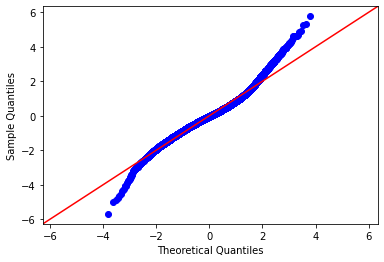

In [222]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Note: There appears to be some issues with the residuals not being normally distributed.
Comment: This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

# Check Homoscedasticity Assumption

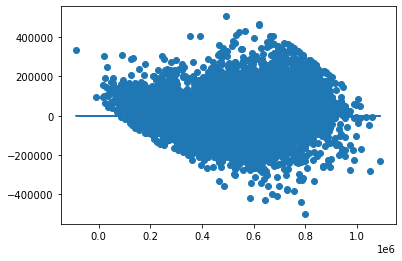

In [223]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

Note: Whilst not ideal, there is no strong evidence of heteroscedasticity. As such we might not need to consider a log transformation of the target variable.

## Evaluate Model using sci-kit learn's cross_val_score

In [224]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([83602.10655124, 93322.85550431, 91128.27614186, 91175.07928688,
       84516.28930909, 83763.25406907, 90623.58936841, 89326.42374998,
       89017.8004274 , 90275.46004823])

88675.11344564776

3285.212770888237

We can interpret the RMSE as the mean error in USD, i.e. on average the actual price will be USD 97,000 more or less than our predicted price. The standard deviation of around USD 1900 is decent meaning our model doest not appear to be overfitting.

130 features

In [225]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,grade_11,grade_4,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
12058,-0.332220,-1.037978,-0.093238,-0.433987,-0.860913,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11215,-0.332220,0.589347,0.683658,0.337524,1.002594,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2316,0.903565,-1.037978,0.528194,0.119789,1.002594,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21540,-1.568006,0.589347,-0.625309,-2.078707,1.002594,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13655,-0.332220,0.589347,0.672016,1.284619,-0.860913,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Save model using pickle

# Model 2: Remove yr_built and zip code

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18677 entries, 0 to 21596
Columns: 206 entries, price to basement_1
dtypes: float64(6), uint8(200)
memory usage: 5.2 MB


In [227]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
0,221900.0,-0.332220,-1.037978,-1.080069,-0.298311,-0.860913,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,-0.332220,0.589347,0.990508,0.036966,1.002594,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,-1.568006,-1.037978,-2.215598,0.472789,-0.860913,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.903565,2.216672,0.269731,-0.463378,-0.860913,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,-0.332220,0.589347,-0.140320,0.184850,-0.860913,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [228]:
list(df.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'yr_built_1901',
 'yr_built_1902',
 'yr_built_1903',
 'yr_built_1904',
 'yr_built_1905',
 'yr_built_1906',
 'yr_built_1907',
 'yr_built_1908',
 'yr_built_1909',
 'yr_built_1910',
 'yr_built_1911',
 'yr_built_1912',
 'yr_built_1913',
 'yr_built_1914',
 'yr_built_1915',
 'yr_built_1916',
 'yr_built_1917',
 'yr_built_1918',
 'yr_built_1919',
 'yr_built_1920',
 'yr_built_1921',
 'yr_built_1922',
 'yr_built_1923',
 'yr_built_1924',
 'yr_built_1925',
 'yr_built_1926',
 'yr_built_1927',
 'yr_built_1928',
 'yr_built_1929',
 'yr_built_1930',
 'yr_built_1931',
 'yr_built_1932',
 'yr_built_1933',
 'yr_built_1934',
 'yr_built_1935',
 'yr_built_1936',
 'yr_built_1937',
 'yr_built_1938',
 'yr_built_1939',
 'yr_built_1940',
 'yr_built_194

In [229]:
model_2_df = df[['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'renovated_1',
 'basement_1']]

In [230]:
model_2_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,grade_11,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,renovated_1,basement_1
0,221900.0,-0.332220,-1.037978,-1.080069,-0.298311,-0.860913,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,538000.0,-0.332220,0.589347,0.990508,0.036966,1.002594,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
2,180000.0,-1.568006,-1.037978,-2.215598,0.472789,-0.860913,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,604000.0,0.903565,2.216672,0.269731,-0.463378,-0.860913,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,510000.0,-0.332220,0.589347,-0.140320,0.184850,-0.860913,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [231]:
# Defining the problem
outcome = 'price'
x_cols = list(model_2_df.columns)
x_cols.remove(outcome)

In [232]:
#train, test = train_test_split(model_2_df)

In [233]:
print(len(train), len(test))
train.head()

14007 4670


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
12058,396500.0,-0.332220,-1.037978,-0.093238,-0.433987,-0.860913,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
11215,753000.0,-0.332220,0.589347,0.683658,0.337524,1.002594,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2316,429000.0,0.903565,-1.037978,0.528194,0.119789,1.002594,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21540,553000.0,-1.568006,0.589347,-0.625309,-2.078707,1.002594,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
13655,557000.0,-0.332220,0.589347,0.672016,1.284619,-0.860913,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [234]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
15932,276000.0,0.903565,0.589347,0.412411,0.036966,1.002594,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3052,308000.0,-1.568006,-1.037978,-1.315627,-0.162000,-0.860913,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1893,599000.0,0.903565,0.589347,0.349941,-1.270819,-0.860913,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3374,144975.0,-1.568006,-1.037978,-1.800615,0.084245,-0.860913,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7096,515000.0,-1.568006,-1.037978,-1.365349,-0.474226,-0.860913,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [235]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     635.6
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:26:49   Log-Likelihood:            -1.8610e+05
No. Observations:               14007   AIC:                         3.722e+05
Df Residuals:                   13986   BIC:                         3.724e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7.463e+05    3.4e+04     21.934      0.000     6.8e+05    8.13e+05
bedrooms     -9698.1029   1599.045     -6.065      0.000   -1.28e+04   -6563.761
bathrooms    -8326.5167   1666.473     -4.996      0.000   -1.16e+04   -5060.006
sqft_living    6.88e+04   2373.467     28.986      0.000    6.41e+04    7.34e+04
sqft_lot     -2.311e+04   1587.807    -14.554      0.000   -2.62e+04      -2e+04
floors        -591.3176   1855.581     -0.319      0.750   -4228.504    3045.869
waterfront_1  9.064e+04    2.7e+04      3.353      0.001    3.77e+04    1.44e+05
view_1         8.97e+04   4946.824     18.133      0.000       8e+04    9.94e+04
condition_2  -7.017e+04   3.56e+04     -1.973      0.048    -1.4e+05    -473.453
condition_3  -5.999e+04   3.31e+04     -1.814      0.070   -1.25e+05    4838.085
condition_4  -1.531e+04   3.31e+04     -0.463      0.644   -8.02e+04    4.96e+04
condition_5    3.78e+04   3.33e+04      1.135      0.256   -2.75e+04    1.03e+05
grade_11      9.476e+04   2.71e+04      3.494      0.000    4.16e+04    1.48e+05
grade_3       3.781e-10   1.08e-10      3.514      0.000    1.67e-10    5.89e-10
grade_4      -3.423e+05   3.22e+04    -10.622      0.000   -4.05e+05   -2.79e+05
grade_5      -3.689e+05   1.48e+04    -24.930      0.000   -3.98e+05    -3.4e+05
grade_6      -3.563e+05   9708.046    -36.701      0.000   -3.75e+05   -3.37e+05
grade_7       -3.16e+05   8475.074    -37.283      0.000   -3.33e+05   -2.99e+05
grade_8        -2.3e+05   8104.696    -28.375      0.000   -2.46e+05   -2.14e+05
grade_9      -1.061e+05   8401.045    -12.630      0.000   -1.23e+05   -8.96e+04
renovated_1   1.028e+05   7414.115     13.867      0.000    8.83e+04    1.17e+05
basement_1    3.123e+04   3066.153     10.184      0.000    2.52e+04    3.72e+04
==============================================================================
Omnibus:                      695.317   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              845.549
Skew:                           0.526   Prob(JB):                    2.46e-184
Kurtosis:                       3.586   Cond. No.                     1.42e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.68e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Perform stepwise selection

In [2259]:
model_2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18948 entries, 0 to 21596
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         18948 non-null  float64
 1   sqft_living   18948 non-null  float64
 2   sqft_lot      18948 non-null  float64
 3   bedrooms_2    18948 non-null  uint8  
 4   bedrooms_3    18948 non-null  uint8  
 5   bedrooms_4    18948 non-null  uint8  
 6   bedrooms_5    18948 non-null  uint8  
 7   bathrooms_1   18948 non-null  uint8  
 8   bathrooms_2   18948 non-null  uint8  
 9   bathrooms_3   18948 non-null  uint8  
 10  bathrooms_4   18948 non-null  uint8  
 11  floors_1_5    18948 non-null  uint8  
 12  floors_2_0    18948 non-null  uint8  
 13  floors_2_5    18948 non-null  uint8  
 14  floors_3_0    18948 non-null  uint8  
 15  floors_3_5    18948 non-null  uint8  
 16  waterfront_1  18948 non-null  uint8  
 17  view_1        18948 non-null  uint8  
 18  condition_2   18948 non-nu

In [2260]:
'''
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward`-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
'''

'\ndef stepwise_selection(X, y, \n                       initial_list=[], \n                       threshold_in=0.01, \n                       threshold_out = 0.05, \n                       verbose=True):\n    """ Perform a forward`-backward feature selection \n    based on p-value from statsmodels.api.OLS\n    Arguments:\n        X - pandas.DataFrame with candidate features\n        y - list-like with the target\n        initial_list - list of features to start with (column names of X)\n        threshold_in - include a feature if its p-value < threshold_in\n        threshold_out - exclude a feature if its p-value > threshold_out\n        verbose - whether to print the sequence of inclusions and exclusions\n    Returns: list of selected features \n    Always set threshold_in < threshold_out to avoid infinite looping.\n    See https://en.wikipedia.org/wiki/Stepwise_regression for the details\n    """\n    included = list(initial_list)\n    while True:\n        changed=False\n        # f

In [2261]:
'''
X = model_2_df.drop('price', axis=1)
y = model_2_df['price']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)
'''

"\nX = model_2_df.drop('price', axis=1)\ny = model_2_df['price']\n\nresult = stepwise_selection(X, y, verbose = True)\nprint('resulting features:')\nprint(result)\n"

In [2262]:
'''
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()
'''

'\nX_fin = X[result]\nX_with_intercept = sm.add_constant(X_fin)\nmodel = sm.OLS(y,X_with_intercept).fit()\nmodel.summary()\n'

Note much of a difference in Adj. R-squared.

21 features, underfitting due to low Adj. R-squared.

# Model 3: Remove yr_built 

In [236]:
model_3_df = df[['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront_1',
 'view_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_11',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98116',
 'zipcode_98117',
 'zipcode_98118',
 'zipcode_98119',
 'zipcode_98122',
 'zipcode_98125',
 'zipcode_98126',
 'zipcode_98133',
 'zipcode_98136',
 'zipcode_98144',
 'zipcode_98146',
 'zipcode_98148',
 'zipcode_98155',
 'zipcode_98166',
 'zipcode_98168',
 'zipcode_98177',
 'zipcode_98178',
 'zipcode_98188',
 'zipcode_98198',
 'zipcode_98199',
 'renovated_1',
 'basement_1']]

In [237]:
model_3_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
0,221900.0,-0.332220,-1.037978,-1.080069,-0.298311,-0.860913,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,538000.0,-0.332220,0.589347,0.990508,0.036966,1.002594,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,180000.0,-1.568006,-1.037978,-2.215598,0.472789,-0.860913,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,0.903565,2.216672,0.269731,-0.463378,-0.860913,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,-0.332220,0.589347,-0.140320,0.184850,-0.860913,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [238]:
# Defining the problem
outcome = 'price'
x_cols = list(model_3_df.columns)
x_cols.remove(outcome)

In [239]:
print(len(train), len(test))
train.head()

14007 4670


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
12058,396500.0,-0.332220,-1.037978,-0.093238,-0.433987,-0.860913,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
11215,753000.0,-0.332220,0.589347,0.683658,0.337524,1.002594,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2316,429000.0,0.903565,-1.037978,0.528194,0.119789,1.002594,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21540,553000.0,-1.568006,0.589347,-0.625309,-2.078707,1.002594,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
13655,557000.0,-0.332220,0.589347,0.672016,1.284619,-0.860913,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [240]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
15932,276000.0,0.903565,0.589347,0.412411,0.036966,1.002594,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3052,308000.0,-1.568006,-1.037978,-1.315627,-0.162000,-0.860913,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1893,599000.0,0.903565,0.589347,0.349941,-1.270819,-0.860913,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3374,144975.0,-1.568006,-1.037978,-1.800615,0.084245,-0.860913,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7096,515000.0,-1.568006,-1.037978,-1.365349,-0.474226,-0.860913,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [241]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     741.1
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:28:23   Log-Likelihood:            -1.7839e+05
No. Observations:               14007   AIC:                         3.570e+05
Df Residuals:                   13917   BIC:                         3.576e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.484e+05   2.05e+04     16.953      0.000    3.08e+05    3.89e+05
bedrooms      -2896.9535    940.036     -3.082      0.002   -4739.550   -1054.357
bathrooms      6293.8342    976.844      6.443      0.000    4379.088    8208.580
sqft_living    7.575e+04   1404.076     53.950      0.000     7.3e+04    7.85e+04
sqft_lot       2.003e+04   1067.766     18.763      0.000    1.79e+04    2.21e+04
floors        -3584.3927   1103.645     -3.248      0.001   -5747.685   -1421.100
waterfront_1   1.907e+05   1.61e+04     11.834      0.000    1.59e+05    2.22e+05
view_1         8.386e+04   2963.818     28.295      0.000    7.81e+04    8.97e+04
condition_2    4.863e+04   2.06e+04      2.358      0.018    8203.635     8.9e+04
condition_3    7.547e+04   1.92e+04      3.931      0.000    3.78e+04    1.13e+05
condition_4    9.618e+04   1.92e+04      5.009      0.000    5.85e+04    1.34e+05
condition_5     1.28e+05   1.93e+04      6.626      0.000    9.01e+04    1.66e+05
grade_11        8.53e+04   1.58e+04      5.389      0.000    5.43e+04    1.16e+05
grade_3       -2.638e-10   1.03e-10     -2.570      0.010   -4.65e-10   -6.26e-11
grade_4       -1.237e+05   1.88e+04     -6.565      0.000   -1.61e+05   -8.67e+04
grade_5       -1.827e+05   8775.028    -20.825      0.000      -2e+05   -1.66e+05
grade_6       -1.956e+05   5861.288    -33.371      0.000   -2.07e+05   -1.84e+05
grade_7       -1.843e+05   5099.794    -36.141      0.000   -1.94e+05   -1.74e+05
grade_8       -1.397e+05   4809.939    -29.039      0.000   -1.49e+05    -1.3e+05
grade_9       -5.784e+04   4922.174    -11.751      0.000   -6.75e+04   -4.82e+04
zipcode_98002  9463.9307   8564.669      1.105      0.269   -7323.973    2.63e+04
zipcode_98003  4756.5709   7789.692      0.611      0.541   -1.05e+04       2e+04
zipcode_98004  5.208e+05   9218.727     56.497      0.000    5.03e+05    5.39e+05
zipcode_98005   3.41e+05   9955.175     34.256      0.000    3.22e+05    3.61e+05
zipcode_98006  2.817e+05   7393.046     38.099      0.000    2.67e+05    2.96e+05
zipcode_98007  2.593e+05   1.01e+04     25.739      0.000     2.4e+05    2.79e+05
zipcode_98008  2.575e+05   7987.962     32.237      0.000    2.42e+05    2.73e+05
zipcode_98010  7.477e+04   1.31e+04      5.720      0.000    4.91e+04       1e+05
zipcode_98011  1.575e+05   8825.085     17.841      0.000     1.4e+05    1.75e+05
zipcode_98014  1.094e+05   1.26e+04      8.710      0.000    8.48e+04    1.34e+05
zipcode_98019  1.041e+05   9151.601     11.381      0.000    8.62e+04    1.22e+05
zipcode_98022 -6848.2269   9295.149     -0.737      0.461   -2.51e+04    1.14e+04
zipcode_98023 -1.009e+04   6808.183     -1.482      0.138   -2.34e+04    3253.740
zipcode_98024  1.171e+05   1.53e+04      7.638      0.000    8.71e+04    1.47e+05
zipcode_98027  2.148e+05   7725.705     27.802   

## Remove Uninfluential features part 2

In [242]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

91 83
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,3.484e+05,2.05e+04,16.953,0.000,3.08e+05,3.89e+05
bedrooms,-2896.9535,940.036,-3.082,0.002,-4739.550,-1054.357
bathrooms,6293.8342,976.844,6.443,0.000,4379.088,8208.580
sqft_living,7.575e+04,1404.076,53.950,0.000,7.3e+04,7.85e+04
sqft_lot,2.003e+04,1067.766,18.763,0.000,1.79e+04,2.21e+04


In [243]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     803.4
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:28:43   Log-Likelihood:            -1.7840e+05
No. Observations:               14007   AIC:                         3.570e+05
Df Residuals:                   13924   BIC:                         3.576e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.501e+05   1.99e+04     17.559      0.000    3.11e+05    3.89e+05
bedrooms      -2932.0015    939.836     -3.120      0.002   -4774.206   -1089.797
bathrooms      6383.8999    976.730      6.536      0.000    4469.379    8298.421
sqft_living    7.587e+04   1403.448     54.062      0.000    7.31e+04    7.86e+04
sqft_lot           2e+04   1064.644     18.789      0.000    1.79e+04    2.21e+04
floors        -3461.9922   1102.835     -3.139      0.002   -5623.698   -1300.287
waterfront_1   1.906e+05   1.61e+04     11.822      0.000    1.59e+05    2.22e+05
view_1         8.354e+04   2957.521     28.248      0.000    7.77e+04    8.93e+04
condition_2     4.91e+04   2.06e+04      2.380      0.017    8661.117    8.95e+04
condition_3    7.618e+04   1.92e+04      3.967      0.000    3.85e+04    1.14e+05
condition_4    9.697e+04   1.92e+04      5.048      0.000    5.93e+04    1.35e+05
condition_5     1.29e+05   1.93e+04      6.676      0.000    9.11e+04    1.67e+05
grade_11       8.541e+04   1.58e+04      5.394      0.000    5.44e+04    1.16e+05
grade_3        2.002e-09   2.51e-10      7.981      0.000    1.51e-09    2.49e-09
grade_4       -1.228e+05   1.88e+04     -6.516      0.000    -1.6e+05   -8.58e+04
grade_5       -1.818e+05   8761.925    -20.750      0.000   -1.99e+05   -1.65e+05
grade_6       -1.949e+05   5854.081    -33.299      0.000   -2.06e+05   -1.83e+05
grade_7       -1.836e+05   5095.723    -36.037      0.000   -1.94e+05   -1.74e+05
grade_8       -1.394e+05   4810.653    -28.972      0.000   -1.49e+05    -1.3e+05
grade_9        -5.76e+04   4922.953    -11.701      0.000   -6.73e+04    -4.8e+04
zipcode_98004  5.182e+05   7817.939     66.277      0.000    5.03e+05    5.33e+05
zipcode_98005  3.384e+05   8676.389     39.003      0.000    3.21e+05    3.55e+05
zipcode_98006   2.79e+05   5541.363     50.356      0.000    2.68e+05     2.9e+05
zipcode_98007  2.566e+05   8811.107     29.119      0.000    2.39e+05    2.74e+05
zipcode_98008  2.548e+05   6314.077     40.359      0.000    2.42e+05    2.67e+05
zipcode_98010  7.186e+04   1.21e+04      5.918      0.000    4.81e+04    9.57e+04
zipcode_98011  1.547e+05   7371.584     20.981      0.000     1.4e+05    1.69e+05
zipcode_98014  1.066e+05   1.16e+04      9.192      0.000    8.38e+04    1.29e+05
zipcode_98019  1.012e+05   7771.220     13.023      0.000     8.6e+04    1.16e+05
zipcode_98024  1.144e+05   1.46e+04      7.858      0.000    8.59e+04    1.43e+05
zipcode_98027   2.12e+05   5991.467     35.390      0.000       2e+05    2.24e+05
zipcode_98028  1.399e+05   6186.856     22.611      0.000    1.28e+05    1.52e+05
zipcode_98029  2.399e+05   6025.971     39.818      0.000    2.28e+05    2.52e+05
zipcode_98031  1.546e+04   6255.541      2.471      0.013    3197.214    2.77e+04
zipcode_98033  3.281e+05   5514.969     59.501   

## Evaluate Model using sci-kit learn's cross_val_score

In [244]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([79266.80538252, 86460.69420352, 84886.99130153, 85471.14245686,
       78670.55626825, 77363.11642968, 85056.94003992, 82832.94265342,
       83454.69736597, 84659.02281694])

82812.29089186128

3049.0102794518198

# Check the Normality Assumption

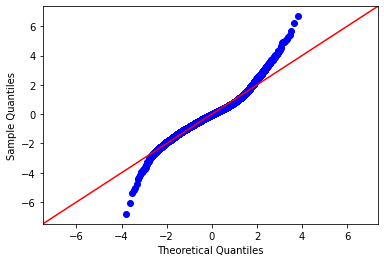

In [245]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Comment: This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

# Check Homoscedasticity Assumption

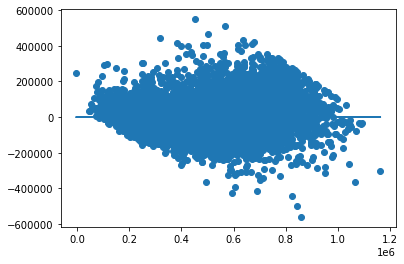

In [246]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

## Investigate Multicollinearity

In [247]:
# Your code here
X = model_3_df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.8382118002448964),
 ('bathrooms', 1.9475239441046783),
 ('sqft_living', 4.062732543175563),
 ('sqft_lot', 2.3122208926416863),
 ('floors', 2.5056458359895135),
 ('waterfront_1', 1.1059742054633552),
 ('view_1', 1.2555317855320371),
 ('condition_2', 1.421154693493439),
 ('condition_3', 33.337249838678744),
 ('condition_4', 14.947966344560612),
 ('condition_5', 5.221289635283008),
 ('grade_11', 1.0985004784350922),
 ('grade_3', 1.006285439657657),
 ('grade_4', 1.1190755900731961),
 ('grade_5', 1.7248168597213311),
 ('grade_6', 6.9260707904115995),
 ('grade_7', 22.666483742900553),
 ('grade_8', 13.284903695949785),
 ('grade_9', 5.041545204075423),
 ('zipcode_98004', 1.0697595368437607),
 ('zipcode_98005', 1.0741028964293118),
 ('zipcode_98006', 1.1904145900988523),
 ('zipcode_98007', 1.0588501026202013),
 ('zipcode_98008', 1.122272783324567),
 ('zipcode_98010', 1.042121522781083),
 ('zipcode_98011', 1.083742371925067),
 ('zipcode_98014', 1.0471899979168757),
 ('zipcode_980

## Perform Another Round of Feature Selection

In [248]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

83 76


In [249]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     714.3
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:29:17   Log-Likelihood:            -1.7958e+05
No. Observations:               14007   AIC:                         3.593e+05
Df Residuals:                   13931   BIC:                         3.599e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.792e+05   2255.908    123.779      0.000    2.75e+05    2.84e+05
bedrooms      -8787.7211   1008.692     -8.712      0.000   -1.08e+04   -6810.549
bathrooms      1.111e+04   1049.949     10.579      0.000    9049.343    1.32e+04
sqft_living    1.013e+05   1368.188     74.070      0.000    9.87e+04    1.04e+05
sqft_lot       2.294e+04   1145.462     20.026      0.000    2.07e+04    2.52e+04
floors         1605.9561   1161.210      1.383      0.167    -670.172    3882.084
waterfront_1   1.897e+05   1.75e+04     10.831      0.000    1.55e+05    2.24e+05
view_1         9.725e+04   3194.460     30.443      0.000     9.1e+04    1.04e+05
condition_2   -3.735e+04   8658.161     -4.314      0.000   -5.43e+04   -2.04e+04
grade_11        1.62e+05   1.67e+04      9.706      0.000    1.29e+05    1.95e+05
grade_3       -8.011e-10   2.01e-11    -39.842      0.000    -8.4e-10   -7.62e-10
grade_4        9.424e+04   1.95e+04      4.842      0.000    5.61e+04    1.32e+05
grade_5        2.396e+04   7354.394      3.258      0.001    9547.625    3.84e+04
zipcode_98004   5.41e+05   8482.792     63.775      0.000    5.24e+05    5.58e+05
zipcode_98005  3.701e+05   9391.598     39.403      0.000    3.52e+05    3.88e+05
zipcode_98006  3.165e+05   5958.983     53.108      0.000    3.05e+05    3.28e+05
zipcode_98007  2.829e+05   9556.384     29.606      0.000    2.64e+05    3.02e+05
zipcode_98008  2.653e+05   6854.859     38.700      0.000    2.52e+05    2.79e+05
zipcode_98010  7.146e+04   1.32e+04      5.415      0.000    4.56e+04    9.73e+04
zipcode_98011  1.584e+05   8005.757     19.789      0.000    1.43e+05    1.74e+05
zipcode_98014   1.03e+05   1.26e+04      8.182      0.000    7.84e+04    1.28e+05
zipcode_98019  8.287e+04   8429.404      9.831      0.000    6.63e+04    9.94e+04
zipcode_98024  1.091e+05   1.58e+04      6.899      0.000    7.81e+04     1.4e+05
zipcode_98027  2.291e+05   6495.972     35.264      0.000    2.16e+05    2.42e+05
zipcode_98028  1.397e+05   6721.153     20.787      0.000    1.27e+05    1.53e+05
zipcode_98029  2.597e+05   6520.816     39.833      0.000    2.47e+05    2.73e+05
zipcode_98031  1.184e+04   6796.323      1.743      0.081   -1476.892    2.52e+04
zipcode_98033   3.44e+05   5984.082     57.493      0.000    3.32e+05    3.56e+05
zipcode_98034  1.942e+05   5136.827     37.812      0.000    1.84e+05    2.04e+05
zipcode_98038  3.282e+04   5224.906      6.281      0.000    2.26e+04    4.31e+04
zipcode_98039  6.951e+05   4.49e+04     15.475      0.000    6.07e+05    7.83e+05
zipcode_98040   4.87e+05   9130.197     53.340      0.000    4.69e+05    5.05e+05
zipcode_98045  8.989e+04   8236.371     10.913      0.000    7.37e+04    1.06e+05
zipcode_98052  2.905e+05   4962.937     58.543      0.000    2.81e+05       3e+05
zipcode_98053  2.406e+05   6326.878     38.025   

In [250]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = train[x_cols]
y_train = train['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_train, y_train)

scores = cross_val_score(
            linreg, 
            X_train,
            y_train,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([85741.08836801, 94521.55293412, 92379.76581798, 93004.32905894,
       86104.66342805, 84654.6452891 , 92138.07084103, 89974.14595896,
       90966.16583359, 90651.31619116])

90013.57437209394

3208.525729643861

In [251]:
# Save model
tuple_objects = (linreg, X_train, y_train)
pickle.dump(tuple_objects, open('model_3.pkl','wb'))

# Predictions with test data

In [252]:
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_1,view_1,condition_2,condition_3,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,renovated_1,basement_1
15932,276000.0,0.903565,0.589347,0.412411,0.036966,1.002594,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3052,308000.0,-1.568006,-1.037978,-1.315627,-0.162000,-0.860913,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1893,599000.0,0.903565,0.589347,0.349941,-1.270819,-0.860913,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3374,144975.0,-1.568006,-1.037978,-1.800615,0.084245,-0.860913,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7096,515000.0,-1.568006,-1.037978,-1.365349,-0.474226,-0.860913,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [253]:
len(test)

4670

In [254]:
# Fitting the actual model
outcome = 'price'
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     231.4
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:29:45   Log-Likelihood:                -59981.
No. Observations:                4670   AIC:                         1.201e+05
Df Residuals:                    4593   BIC:                         1.206e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.754e+05   4031.775     68.315      0.000    2.68e+05    2.83e+05
bedrooms      -9848.0297   1851.483     -5.319      0.000   -1.35e+04   -6218.233
bathrooms      1.291e+04   1863.618      6.929      0.000    9259.519    1.66e+04
sqft_living    9.947e+04   2452.932     40.553      0.000    9.47e+04    1.04e+05
sqft_lot       2.779e+04   2040.730     13.619      0.000    2.38e+04    3.18e+04
floors         5578.8621   2102.295      2.654      0.008    1457.354    9700.370
waterfront_1   2.308e+05   3.09e+04      7.479      0.000     1.7e+05    2.91e+05
view_1          8.32e+04   5683.590     14.638      0.000    7.21e+04    9.43e+04
condition_2   -4.881e+04   1.62e+04     -3.019      0.003   -8.05e+04   -1.71e+04
grade_11       1.757e+05    2.5e+04      7.021      0.000    1.27e+05    2.25e+05
grade_3        2.995e+05   9.26e+04      3.234      0.001    1.18e+05    4.81e+05
grade_4        4.887e+04   4.19e+04      1.166      0.244   -3.33e+04    1.31e+05
grade_5        1.735e+04   1.27e+04      1.364      0.173   -7594.451    4.23e+04
zipcode_98004  5.506e+05   1.76e+04     31.277      0.000    5.16e+05    5.85e+05
zipcode_98005  3.834e+05   1.58e+04     24.338      0.000    3.53e+05    4.14e+05
zipcode_98006  3.247e+05   1.01e+04     32.046      0.000    3.05e+05    3.45e+05
zipcode_98007   2.85e+05   1.73e+04     16.440      0.000    2.51e+05    3.19e+05
zipcode_98008  2.531e+05   1.24e+04     20.378      0.000    2.29e+05    2.77e+05
zipcode_98010  7.937e+04   1.82e+04      4.352      0.000    4.36e+04    1.15e+05
zipcode_98011  1.603e+05   1.42e+04     11.315      0.000    1.33e+05    1.88e+05
zipcode_98014  6.287e+04   1.98e+04      3.172      0.002     2.4e+04    1.02e+05
zipcode_98019  8.482e+04   1.59e+04      5.321      0.000    5.36e+04    1.16e+05
zipcode_98024   1.64e+05   3.52e+04      4.661      0.000     9.5e+04    2.33e+05
zipcode_98027  2.384e+05   1.11e+04     21.559      0.000    2.17e+05     2.6e+05
zipcode_98028   1.43e+05   1.19e+04     12.041      0.000     1.2e+05    1.66e+05
zipcode_98029  2.561e+05   1.19e+04     21.455      0.000    2.33e+05     2.8e+05
zipcode_98031  1.827e+04   1.19e+04      1.541      0.123   -4979.997    4.15e+04
zipcode_98033  3.371e+05   1.06e+04     31.947      0.000    3.16e+05    3.58e+05
zipcode_98034  1.961e+05   9062.721     21.640      0.000    1.78e+05    2.14e+05
zipcode_98038  2.771e+04   8672.947      3.195      0.001    1.07e+04    4.47e+04
zipcode_98039  6.489e+05   6.54e+04      9.915      0.000    5.21e+05    7.77e+05
zipcode_98040  4.646e+05   1.47e+04     31.712      0.000    4.36e+05    4.93e+05
zipcode_98045  9.395e+04   1.35e+04      6.943      0.000    6.74e+04     1.2e+05
zipcode_98052  2.755e+05   9501.180     28.998      0.000    2.57e+05    2.94e+05
zipcode_98053  2.512e+05   1.25e+04     20.102   

In [2282]:
len(x_cols)

77

In [2283]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_test = test[x_cols]
y_test = test['price']

# Create linear regression object
linreg = LinearRegression()

# Fit on training data
linreg.fit(X_test, y_test)

scores = cross_val_score(
            linreg, 
            X_test,
            y_test,
            cv=10,
            scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([2.51009059e+16, 8.83327856e+04, 8.41626096e+04, 8.39557712e+04,
       8.77397826e+04, 9.42116913e+04, 8.55290248e+04, 9.58522750e+04,
       9.57391721e+04, 9.58128089e+04])

2510090585326652.0

7530271755709511.0

# THINK: LIMIT ZIP CODES, WHAT ARE MY TOP ONES?

Note: Location within King County is important with a noticeable disparity amongst zipcodes. The median house price ranges from \$235,000 in 98002 up to \$1,260,000 in 98039.